<a href="https://colab.research.google.com/github/adu-CS/Car_Dataset_ML/blob/main/carDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

#read loaded dataframe
df=pd.read_csv('cardata.csv')

In [ ]:
#Prints first 5 rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#prints last 5 rows
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
#size
df.size

2709

In [ ]:
#shape
df.shape

(301, 9)

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
#Types of transmissions in dataset and it's count
print(df['Transmission'].unique())
print(df['Transmission'].value_counts())

['Manual' 'Automatic']
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
#car
print(df['Car_Name'].unique())
print(df['Car_Name'].value_counts())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [ ]:
filtered_df=df[(df['Car_Name'].str[0].str.islower())]
print(filtered_df)
#shows ones starting with lowercase(which differentiates cars from bikes)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [ ]:
#//Data Cleaning//

#removes duplicates
print("Duplicates are", df.duplicated().sum())

Duplicates are 2


In [ ]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [ ]:
# remove duplicates

df = df.drop_duplicates()
print("Duplicates are", df.duplicated().sum())


Duplicates are 0


In [ ]:
#Null values
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


<Axes: ylabel='Kms_Driven'>

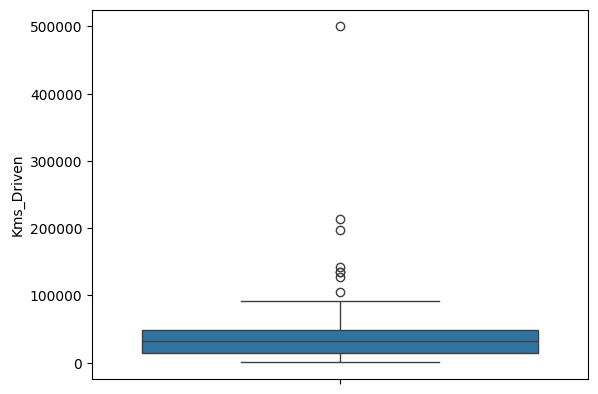

In [ ]:
#before filtering outliers
sns.boxplot(df['Kms_Driven'])

In [ ]:
#iqr method to remove outliers
q1=df['Kms_Driven'].quantile(.25) #1st quantile(1st 25 percent of values)
q3=df['Kms_Driven'].quantile(.75) #3rd quantile(1st 75 percent of values)
iqr=q3-q1 #Inter-quartile Range - The middle 50 percent data
min=q1-iqr*1.5 #Considers values that lie below 1.5 times the iqr, from q1; outliers
max=q3+iqr*1.5 #Considers values that lie beyond 1.5 times the iqr, from q3; outliers

filtered_df=df[(df['Kms_Driven']>=min)&(df['Kms_Driven']<=max)] #filters the kms_driven column to remove outliers, creates a new df 'filtered_df'
filtered_df


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


<Axes: ylabel='Kms_Driven'>

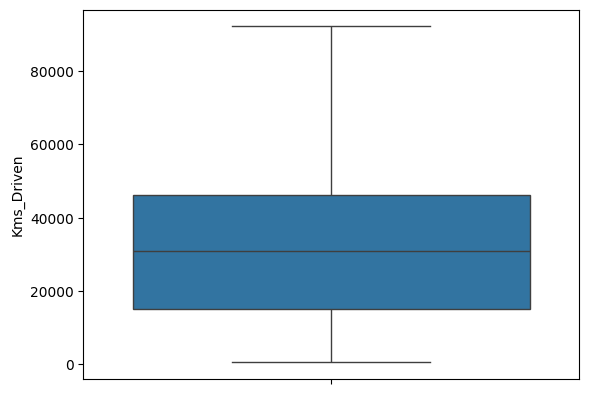

In [ ]:
#filtered outliers
sns.boxplot(filtered_df['Kms_Driven'])

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,58
CNG,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [ ]:
#converts categorical to numerical
#merges catgory and subcategory to form a new category
df=pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Car_Name                299 non-null    object 
 1   Year                    299 non-null    int64  
 2   Selling_Price           299 non-null    float64
 3   Present_Price           299 non-null    float64
 4   Kms_Driven              299 non-null    int64  
 5   Owner                   299 non-null    int64  
 6   Fuel_Type_Diesel        299 non-null    bool   
 7   Fuel_Type_Petrol        299 non-null    bool   
 8   Seller_Type_Individual  299 non-null    bool   
 9   Transmission_Manual     299 non-null    bool   
dtypes: bool(4), float64(2), int64(3), object(1)
memory usage: 17.5+ KB


In [ ]:
#Drop 'Selling_Price' variable, as we make it the target variable
X=df.drop(['Selling_Price', 'Car_Name'],axis=1)



In [ ]:
#target variable
y=df['Selling_Price']

In [ ]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    299 non-null    int64  
 1   Present_Price           299 non-null    float64
 2   Kms_Driven              299 non-null    int64  
 3   Owner                   299 non-null    int64  
 4   Fuel_Type_Diesel        299 non-null    bool   
 5   Fuel_Type_Petrol        299 non-null    bool   
 6   Seller_Type_Individual  299 non-null    bool   
 7   Transmission_Manual     299 non-null    bool   
dtypes: bool(4), float64(1), int64(3)
memory usage: 12.8 KB
<class 'pandas.core.series.Series'>
Index: 299 entries, 0 to 300
Series name: Selling_Price
Non-Null Count  Dtype  
--------------  -----  
299 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [ ]:
#Apply train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=44)


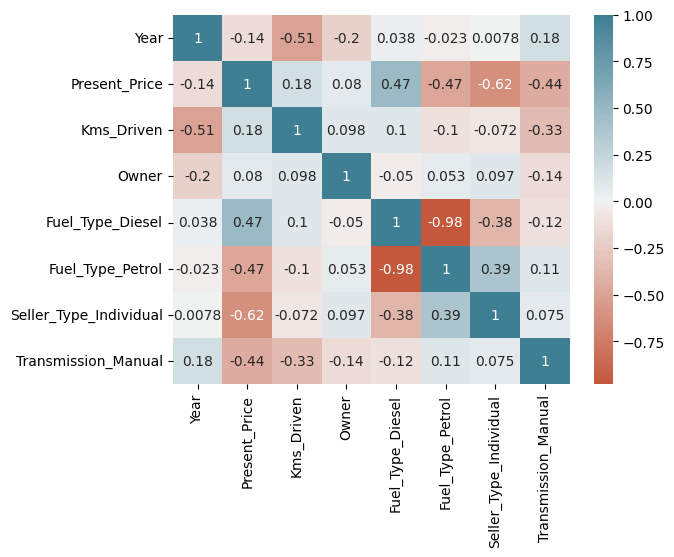

In [ ]:
sns.heatmap(X_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, center = 0, );
#shows correlation between features. Can choose the features that strongly affect price

In [ ]:
#Linear reg

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
linear_preds = linear_model.predict(X_test)

# Calculate Evaluation Metrics for Linear Regression
linear_mae = mean_absolute_error(y_test, linear_preds)
linear_mse = mean_squared_error(y_test, linear_preds)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_preds)

# Print the results
print("Linear Regression:")
print("MAE:", linear_mae)
print("MSE:", linear_mse)
print("RMSE:", linear_rmse)
print("R² Score:", linear_r2)


Linear Regression:
MAE: 1.3013190586079868
MSE: 3.783552800685435
RMSE: 1.9451356766779626
R² Score: 0.8671538864311248


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Adjust alpha for regularization strength if needed
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate Ridge metrics
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)  # RMSE is the square root of MSE
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results:")
print("MAE:", ridge_mae)
print("MSE:", ridge_mse)
print("RMSE:", ridge_rmse)
print("R^2 Score:", ridge_r2)



Ridge Regression Results:
MAE: 1.3031824405132961
MSE: 3.831930011084409
RMSE: 1.9575316117714188
R^2 Score: 0.8654552912943942


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength if needed
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Calculate Lasso metrics
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)  # RMSE is the square root of MSE
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Results:")
print("MAE:", lasso_mae)
print("MSE:", lasso_mse)
print("RMSE:", lasso_rmse)
print("R^2 Score:", lasso_r2)


Lasso Regression Results:
MAE: 1.3091529146131373
MSE: 4.400692164002288
RMSE: 2.097782677972694
R^2 Score: 0.8454852140837582


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, make_scorer

# Define the parameter grid for Ridge and Lasso
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Create a scorer based on the negative mean squared error to optimize for smaller errors
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Ridge Regression - Hyperparameter Tuning
ridge_search = GridSearchCV(Ridge(), param_grid=ridge_params, scoring=mse_scorer, cv=5)
ridge_search.fit(X_train, y_train)
best_ridge = ridge_search.best_estimator_

print("Best Ridge Parameters:", ridge_search.best_params_)
print("Best Ridge Score:", -ridge_search.best_score_)  # MSE, flipped to positive for readability

# Lasso Regression - Hyperparameter Tuning
lasso_search = GridSearchCV(Lasso(), param_grid=lasso_params, scoring=mse_scorer, cv=5)
lasso_search.fit(X_train, y_train)
best_lasso = lasso_search.best_estimator_

print("\nBest Lasso Parameters:", lasso_search.best_params_)
print("Best Lasso Score:", -lasso_search.best_score_)  # MSE, flipped to positive for readability


Best Ridge Parameters: {'alpha': 100}
Best Ridge Score: 6.984073999632548

Best Lasso Parameters: {'alpha': 0.1}
Best Lasso Score: 7.223859535605433


In [ ]:
#Initialize the RF model
rf_mod = RandomForestRegressor()

In [ ]:
#Fit the model to train and test data
rf_mod.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred=rf_mod.predict(X_test)

In [ ]:
feature_names = X_train.columns

In [ ]:
y_pred = rf_mod.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 0.9528793333333336
MSE: 5.732758065933333
RMSE: 2.3943178706958133
R²: 0.7987144175834162


In [ ]:
visual_model=DecisionTreeRegressor(max_depth=3)

In [ ]:
visual_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

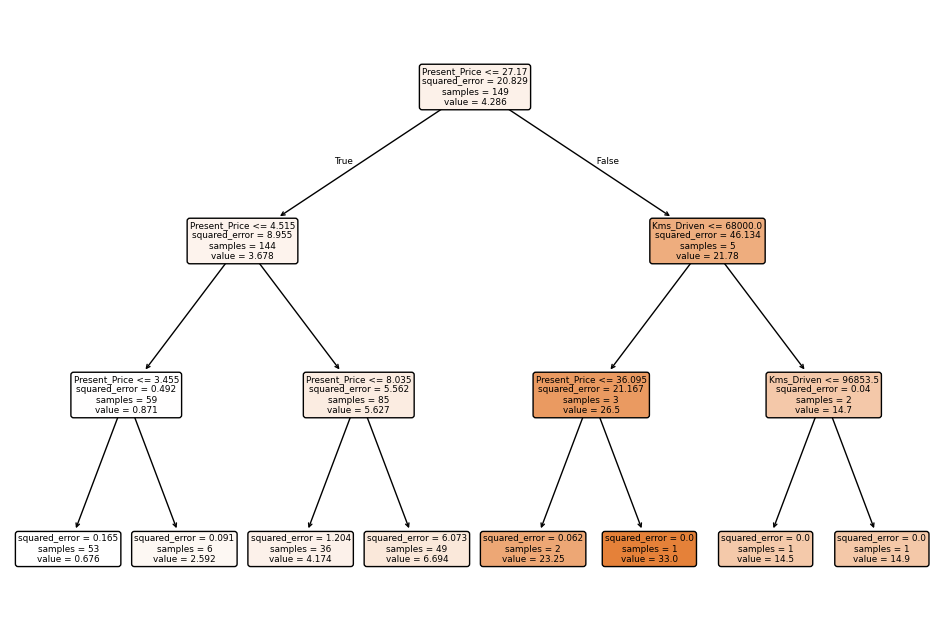

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(visual_model, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()

|--- Present_Price <= 5.64
|   |--- Seller_Type_Individual <= 0.50
|   |   |--- Present_Price <= 4.51
|   |   |   |--- Year <= 2014.50
|   |   |   |   |--- Kms_Driven <= 45993.00
|   |   |   |   |   |--- value: [2.50]
|   |   |   |   |--- Kms_Driven >  45993.00
|   |   |   |   |   |--- value: [2.55]
|   |   |   |--- Year >  2014.50
|   |   |   |   |--- Year <= 2015.50
|   |   |   |   |   |--- value: [2.75]
|   |   |   |   |--- Year >  2015.50
|   |   |   |   |   |--- Year <= 2016.50
|   |   |   |   |   |   |--- value: [2.90]
|   |   |   |   |   |--- Year >  2016.50
|   |   |   |   |   |   |--- value: [2.85]
|   |   |--- Present_Price >  4.51
|   |   |   |--- Kms_Driven <= 31387.50
|   |   |   |   |--- value: [3.35]
|   |   |   |--- Kms_Driven >  31387.50
|   |   |   |   |--- Kms_Driven <= 44725.00
|   |   |   |   |   |--- value: [3.10]
|   |   |   |   |--- Kms_Driven >  44725.00
|   |   |   |   |   |--- value: [3.00]
|   |--- Seller_Type_Individual >  0.50
|   |   |--- Present_Price <=

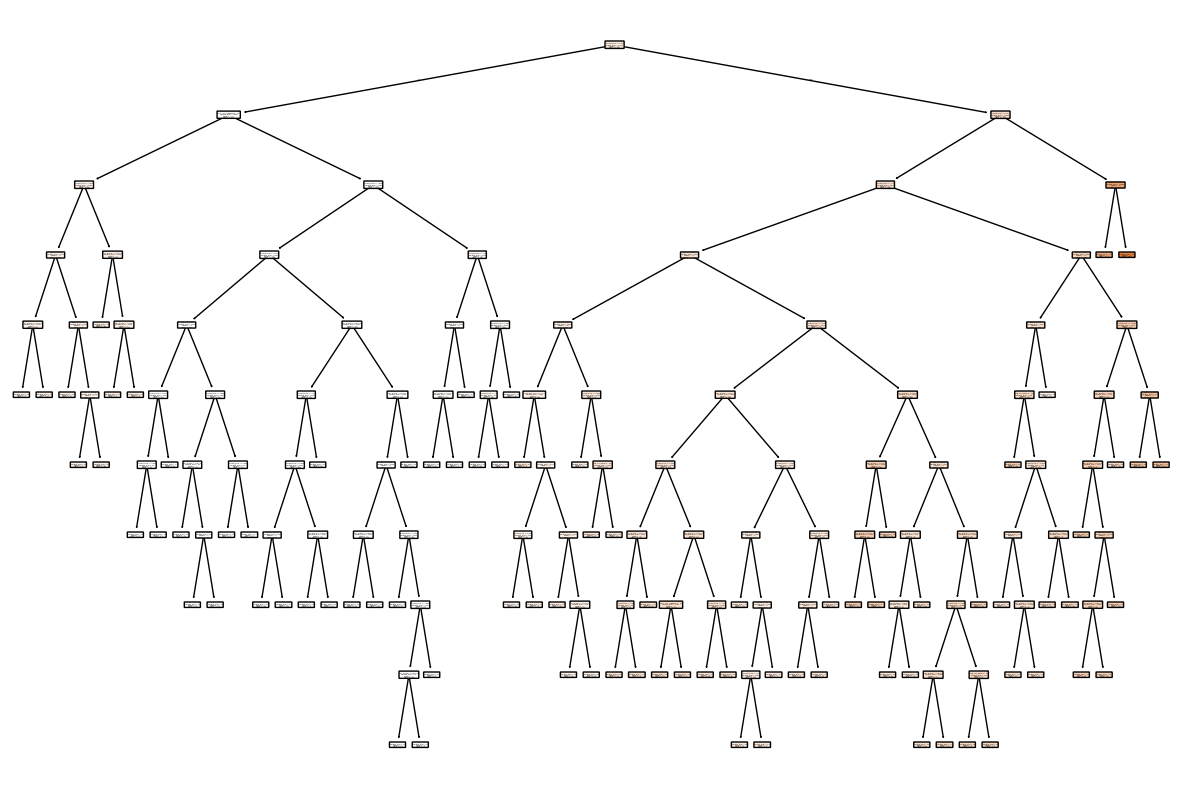

In [ ]:
from sklearn.tree import export_text

# Assuming rf_model is your trained Random Forest model
# Extract a single decision tree from the forest
tree_1 = rf_mod.estimators_[1]  # Get the first tree

# Text-based visualization
tree_rules = export_text(tree_1, feature_names=list(X_train.columns))
print(tree_rules)

# Plotting a tree visually
plt.figure(figsize=(15, 10))
plot_tree(tree_1, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(200, 500),           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],            # Maximum depth of the tree
    'min_samples_split': randint(2, 10),        # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 10),          # Minimum samples required to be at a leaf node
    'max_features': ['sqrt'],           # Number of features to consider at each split
}



# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_mod, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to find the best parameters
random_search.fit(X_train, y_train)

# Get the best estimator and parameters
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

best_rf.fit(X_train, y_train)  # Retraining with the entire training set

y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")



Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 208}
MAE: 1.0004743589743585
MSE: 5.865106981740005
RMSE: 2.4217982950155044
R²: 0.7940674521447983


In [ ]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [ ]:
best_model = RandomForestRegressor(**best_params, random_state=42)
# Train the new model on the training data
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

MAE: 1.0275266025641019
MSE: 6.292103340282905
R2 Score: 0.779074980854267
